In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft,fftfreq
data1 = loadmat('data_exp.mat')
data2 = loadmat('data_pred1.mat')
data3 = loadmat('data_pred2.mat')
F1 = data1['F']
F2 = data2['F']
F3 = data3['F']
displacement1 = data1['x'] 
displacement2 = data2['x'] 
displacement3 = data3['x'] 
import pandas as pd
F11 = pd.DataFrame(F1)
displacement11 = pd.DataFrame(displacement1)
#train_data = pd.concat([F11, displacement11], axis=1)
train_data = F1
F21 = pd.DataFrame(F2)
displacement21 = pd.DataFrame(displacement2)
F31 = pd.DataFrame(F3)
displacement31 = pd.DataFrame(displacement3)



test_data = pd.concat([F21, F31], axis = 0)
real_data = pd.concat([displacement21, displacement31], axis = 0)
test_data = np.array(test_data)
real_data = np.array(real_data)
train_features = np.array(train_data, dtype=np.float32)
test_features = np.array(test_data, dtype=np.float32)
train_labels = np.array(
    displacement1, dtype=np.float32)
test_labels = np.array(
    real_data, dtype=np.float32)

In [2]:
X = train_features
Y = train_labels
X_test = test_features
Y_test = test_labels

In [3]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
X_test = X_test.reshape(-1,1)
from sklearn.preprocessing import  MinMaxScaler
scaler_F = MinMaxScaler(feature_range=(-1, 1))
scaler_X = MinMaxScaler(feature_range=(-1, 1))
X = scaler_F.fit_transform(X)
Y = scaler_X.fit_transform(Y)
X_test = scaler_F.transform(X_test)

In [4]:
X = X.reshape(-1,1000)
Y = Y.reshape(-1,1000)
test = X_test.reshape(-1,1000)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size=0.3, random_state=42)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,LSTM,Activation,GRU,Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from tensorflow.keras.optimizers import SGD
import keras
from keras.layers import TimeDistributed
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
earlyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=500, verbose=2, mode='auto', restore_best_weights=True)


# 准备训练数据

# 将输入数据转换为合适的形状
X_train = X_train.reshape((-1, 1000, 1))
y_train = y_train.reshape((-1,1000,1))

# 准备测试数据
X_test = X_test.reshape((-1, 1000, 1))
y_test = y_test.reshape((-1,1000,1))

# 创建RNN模型
model = Sequential()
model.add(GRU(units=50,return_sequences=True,stateful=False, input_shape=(X_train.shape[1], 1),activation='tanh'))  # 第一层LSTM
#model.add(LSTM(units=32,return_sequences=True,stateful=False))  # 第二层LSTM
#model.add(LSTM(units=32,return_sequences=True,stateful=False))  # 第三层LSTM
model.add(Dense(units=100))
model.add(Dense(units=50))
#model.add(Dense(units=32))
model.add(Dense(units=1))

# 编译模型
model.compile(loss='mse', optimizer='adam', metrics = ['mae'])

# 进行预测
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1000, 50)          7950      
_________________________________________________________________
dense (Dense)                (None, 1000, 100)         5100      
_________________________________________________________________
dense_1 (Dense)              (None, 1000, 50)          5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1000, 1)           51        
Total params: 18,151
Trainable params: 18,151
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train,y_train,epochs=2000, validation_data=(X_test, y_test),verbose=1,callbacks = earlyStop)

Epoch 1/2000
3/3 [==============================] - 5s 395ms/step - loss: 0.0615 - mae: 0.2006 - val_loss: 0.0605 - val_mae: 0.1876
Epoch 2/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.0614 - mae: 0.1948 - val_loss: 0.0568 - val_mae: 0.1888
Epoch 3/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.0586 - mae: 0.1968 - val_loss: 0.0577 - val_mae: 0.1938
Epoch 4/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.0560 - mae: 0.1919 - val_loss: 0.0547 - val_mae: 0.1869
Epoch 5/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.0543 - mae: 0.1884 - val_loss: 0.0535 - val_mae: 0.1825
Epoch 6/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.0533 - mae: 0.1850 - val_loss: 0.0525 - val_mae: 0.1801
Epoch 7/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.0525 - mae: 0.1838 - val_loss: 0.0517 - val_mae: 0.1800
Epoch 8/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.

Epoch 63/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0257 - mae: 0.1185 - val_loss: 0.0273 - val_mae: 0.1178
Epoch 64/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0262 - mae: 0.1183 - val_loss: 0.0277 - val_mae: 0.1185
Epoch 65/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.0262 - mae: 0.1193 - val_loss: 0.0267 - val_mae: 0.1180
Epoch 66/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0254 - mae: 0.1173 - val_loss: 0.0275 - val_mae: 0.1181
Epoch 67/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.0256 - mae: 0.1177 - val_loss: 0.0266 - val_mae: 0.1162
Epoch 68/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.0249 - mae: 0.1159 - val_loss: 0.0256 - val_mae: 0.1152
Epoch 69/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0253 - mae: 0.1186 - val_loss: 0.0258 - val_mae: 0.1153
Epoch 70/2000
3/3 [==============================] - 0s 105ms/step - 

3/3 [==============================] - 0s 100ms/step - loss: 0.0164 - mae: 0.0926 - val_loss: 0.0172 - val_mae: 0.0924
Epoch 125/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0169 - mae: 0.0951 - val_loss: 0.0171 - val_mae: 0.0954
Epoch 126/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.0171 - mae: 0.0984 - val_loss: 0.0167 - val_mae: 0.0964
Epoch 127/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.0164 - mae: 0.0972 - val_loss: 0.0157 - val_mae: 0.0925
Epoch 128/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0152 - mae: 0.0924 - val_loss: 0.0150 - val_mae: 0.0870
Epoch 129/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0144 - mae: 0.0875 - val_loss: 0.0137 - val_mae: 0.0826
Epoch 130/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0133 - mae: 0.0844 - val_loss: 0.0125 - val_mae: 0.0800
Epoch 131/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.

3/3 [==============================] - 0s 113ms/step - loss: 0.0108 - mae: 0.0770 - val_loss: 0.0105 - val_mae: 0.0744
Epoch 186/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0101 - mae: 0.0751 - val_loss: 0.0098 - val_mae: 0.0731
Epoch 187/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0096 - mae: 0.0740 - val_loss: 0.0096 - val_mae: 0.0729
Epoch 188/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.0093 - mae: 0.0738 - val_loss: 0.0095 - val_mae: 0.0733
Epoch 189/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.0091 - mae: 0.0739 - val_loss: 0.0090 - val_mae: 0.0724
Epoch 190/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0085 - mae: 0.0716 - val_loss: 0.0082 - val_mae: 0.0692
Epoch 191/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.0077 - mae: 0.0685 - val_loss: 0.0073 - val_mae: 0.0660
Epoch 192/2000
3/3 [==============================] - 0s 116ms/step - loss: 0

3/3 [==============================] - 0s 115ms/step - loss: 0.0076 - mae: 0.0651 - val_loss: 0.0072 - val_mae: 0.0613
Epoch 247/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0066 - mae: 0.0607 - val_loss: 0.0052 - val_mae: 0.0533
Epoch 248/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0039 - mae: 0.0464 - val_loss: 0.0037 - val_mae: 0.0449
Epoch 249/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0030 - mae: 0.0404 - val_loss: 0.0037 - val_mae: 0.0466
Epoch 250/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0037 - mae: 0.0476 - val_loss: 0.0012 - val_mae: 0.0259
Epoch 251/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0032 - mae: 0.0419 - val_loss: 0.0039 - val_mae: 0.0478
Epoch 252/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0047 - mae: 0.0529 - val_loss: 0.0055 - val_mae: 0.0552
Epoch 253/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.

Epoch 306/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.5923e-04 - mae: 0.0093 - val_loss: 1.2459e-04 - val_mae: 0.0079
Epoch 307/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.4385e-04 - mae: 0.0086 - val_loss: 4.2249e-04 - val_mae: 0.0144
Epoch 308/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.6426e-04 - mae: 0.0094 - val_loss: 1.2331e-04 - val_mae: 0.0080
Epoch 309/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.8689e-04 - mae: 0.0099 - val_loss: 1.6194e-04 - val_mae: 0.0092
Epoch 310/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.3595e-04 - mae: 0.0087 - val_loss: 7.7782e-05 - val_mae: 0.0059
Epoch 311/2000
3/3 [==============================] - 0s 112ms/step - loss: 8.8556e-05 - mae: 0.0068 - val_loss: 1.1524e-04 - val_mae: 0.0077
Epoch 312/2000
3/3 [==============================] - 0s 117ms/step - loss: 9.3491e-05 - mae: 0.0071 - val_loss: 1.2729e-04 - val_mae: 0.0075
Epoch 3

Epoch 364/2000
3/3 [==============================] - 0s 111ms/step - loss: 4.6513e-05 - mae: 0.0049 - val_loss: 3.9967e-05 - val_mae: 0.0039
Epoch 365/2000
3/3 [==============================] - 0s 111ms/step - loss: 4.3153e-05 - mae: 0.0046 - val_loss: 6.7808e-05 - val_mae: 0.0056
Epoch 366/2000
3/3 [==============================] - 0s 102ms/step - loss: 6.6136e-05 - mae: 0.0060 - val_loss: 1.0697e-04 - val_mae: 0.0073
Epoch 367/2000
3/3 [==============================] - 0s 109ms/step - loss: 7.7630e-05 - mae: 0.0061 - val_loss: 8.6811e-05 - val_mae: 0.0064
Epoch 368/2000
3/3 [==============================] - 0s 125ms/step - loss: 6.3694e-05 - mae: 0.0057 - val_loss: 7.7521e-05 - val_mae: 0.0062
Epoch 369/2000
3/3 [==============================] - 0s 107ms/step - loss: 6.7383e-05 - mae: 0.0059 - val_loss: 8.0291e-05 - val_mae: 0.0064
Epoch 370/2000
3/3 [==============================] - 0s 106ms/step - loss: 5.9681e-05 - mae: 0.0057 - val_loss: 3.9030e-05 - val_mae: 0.0040
Epoch 

Epoch 422/2000
3/3 [==============================] - 0s 107ms/step - loss: 2.3242e-05 - mae: 0.0034 - val_loss: 2.8577e-05 - val_mae: 0.0032
Epoch 423/2000
3/3 [==============================] - 0s 105ms/step - loss: 2.1106e-05 - mae: 0.0032 - val_loss: 3.2907e-05 - val_mae: 0.0037
Epoch 424/2000
3/3 [==============================] - 0s 135ms/step - loss: 2.1535e-05 - mae: 0.0032 - val_loss: 3.0871e-05 - val_mae: 0.0034
Epoch 425/2000
3/3 [==============================] - 0s 100ms/step - loss: 2.0703e-05 - mae: 0.0031 - val_loss: 3.3908e-05 - val_mae: 0.0037
Epoch 426/2000
3/3 [==============================] - 0s 118ms/step - loss: 2.9424e-05 - mae: 0.0038 - val_loss: 2.9482e-05 - val_mae: 0.0033
Epoch 427/2000
3/3 [==============================] - 0s 101ms/step - loss: 4.5777e-05 - mae: 0.0048 - val_loss: 3.9042e-05 - val_mae: 0.0041
Epoch 428/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.0672e-05 - mae: 0.0039 - val_loss: 6.7040e-05 - val_mae: 0.0059
Epoch 4

Epoch 480/2000
3/3 [==============================] - 0s 114ms/step - loss: 2.6919e-05 - mae: 0.0036 - val_loss: 2.7010e-05 - val_mae: 0.0031
Epoch 481/2000
3/3 [==============================] - 0s 105ms/step - loss: 2.6452e-05 - mae: 0.0035 - val_loss: 2.8854e-05 - val_mae: 0.0032
Epoch 482/2000
3/3 [==============================] - 0s 106ms/step - loss: 3.0637e-05 - mae: 0.0039 - val_loss: 3.9801e-05 - val_mae: 0.0040
Epoch 483/2000
3/3 [==============================] - 0s 104ms/step - loss: 2.2501e-05 - mae: 0.0034 - val_loss: 4.8480e-05 - val_mae: 0.0047
Epoch 484/2000
3/3 [==============================] - 0s 103ms/step - loss: 3.1361e-05 - mae: 0.0039 - val_loss: 6.9575e-05 - val_mae: 0.0058
Epoch 485/2000
3/3 [==============================] - 0s 113ms/step - loss: 4.4717e-05 - mae: 0.0047 - val_loss: 3.9054e-05 - val_mae: 0.0038
Epoch 486/2000
3/3 [==============================] - 0s 107ms/step - loss: 2.7358e-05 - mae: 0.0037 - val_loss: 2.7971e-05 - val_mae: 0.0033
Epoch 

Epoch 538/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.2069e-05 - mae: 0.0033 - val_loss: 2.7249e-05 - val_mae: 0.0033
Epoch 539/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.8727e-05 - mae: 0.0029 - val_loss: 2.2330e-05 - val_mae: 0.0029
Epoch 540/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.6694e-05 - mae: 0.0028 - val_loss: 3.8860e-05 - val_mae: 0.0043
Epoch 541/2000
3/3 [==============================] - 0s 113ms/step - loss: 2.5985e-05 - mae: 0.0038 - val_loss: 6.4984e-05 - val_mae: 0.0059
Epoch 542/2000
3/3 [==============================] - 0s 110ms/step - loss: 4.8407e-05 - mae: 0.0052 - val_loss: 1.2777e-04 - val_mae: 0.0085
Epoch 543/2000
3/3 [==============================] - 0s 117ms/step - loss: 8.4433e-05 - mae: 0.0065 - val_loss: 1.9046e-04 - val_mae: 0.0105
Epoch 544/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.3882e-04 - mae: 0.0088 - val_loss: 2.3364e-04 - val_mae: 0.0115
Epoch 

3/3 [==============================] - 0s 113ms/step - loss: 0.0011 - mae: 0.0246 - val_loss: 8.9153e-04 - val_mae: 0.0225
Epoch 598/2000
3/3 [==============================] - 0s 110ms/step - loss: 9.5591e-04 - mae: 0.0226 - val_loss: 7.9775e-04 - val_mae: 0.0212
Epoch 599/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0011 - mae: 0.0247 - val_loss: 0.0011 - val_mae: 0.0254
Epoch 600/2000
3/3 [==============================] - 0s 108ms/step - loss: 9.0825e-04 - mae: 0.0232 - val_loss: 8.2717e-04 - val_mae: 0.0219
Epoch 601/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0010 - mae: 0.0244 - val_loss: 0.0014 - val_mae: 0.0274
Epoch 602/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.0015 - mae: 0.0290 - val_loss: 6.1436e-04 - val_mae: 0.0187
Epoch 603/2000
3/3 [==============================] - 0s 110ms/step - loss: 9.1308e-04 - mae: 0.0233 - val_loss: 0.0012 - val_mae: 0.0261
Epoch 604/2000
3/3 [=============================

3/3 [==============================] - 0s 110ms/step - loss: 2.5612e-05 - mae: 0.0037 - val_loss: 3.6844e-05 - val_mae: 0.0037
Epoch 656/2000
3/3 [==============================] - 0s 126ms/step - loss: 2.8587e-05 - mae: 0.0038 - val_loss: 5.8699e-05 - val_mae: 0.0051
Epoch 657/2000
3/3 [==============================] - 0s 125ms/step - loss: 5.4477e-05 - mae: 0.0055 - val_loss: 5.7284e-05 - val_mae: 0.0051
Epoch 658/2000
3/3 [==============================] - 0s 115ms/step - loss: 4.7830e-05 - mae: 0.0051 - val_loss: 7.4091e-05 - val_mae: 0.0060
Epoch 659/2000
3/3 [==============================] - 0s 103ms/step - loss: 6.6873e-05 - mae: 0.0061 - val_loss: 9.5105e-05 - val_mae: 0.0070
Epoch 660/2000
3/3 [==============================] - 0s 108ms/step - loss: 7.2483e-05 - mae: 0.0064 - val_loss: 1.3878e-04 - val_mae: 0.0087
Epoch 661/2000
3/3 [==============================] - 0s 127ms/step - loss: 8.4165e-05 - mae: 0.0065 - val_loss: 4.2369e-05 - val_mae: 0.0040
Epoch 662/2000
3/3 [=

Epoch 713/2000
3/3 [==============================] - 0s 117ms/step - loss: 3.3019e-04 - mae: 0.0137 - val_loss: 4.3509e-04 - val_mae: 0.0159
Epoch 714/2000
3/3 [==============================] - 0s 117ms/step - loss: 4.7835e-04 - mae: 0.0171 - val_loss: 1.0853e-04 - val_mae: 0.0077
Epoch 715/2000
3/3 [==============================] - 0s 115ms/step - loss: 2.2072e-04 - mae: 0.0108 - val_loss: 4.2883e-04 - val_mae: 0.0154
Epoch 716/2000
3/3 [==============================] - 0s 105ms/step - loss: 2.7537e-04 - mae: 0.0129 - val_loss: 2.0302e-04 - val_mae: 0.0102
Epoch 717/2000
3/3 [==============================] - 0s 106ms/step - loss: 2.4198e-04 - mae: 0.0122 - val_loss: 1.0617e-04 - val_mae: 0.0074
Epoch 718/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.3199e-04 - mae: 0.0088 - val_loss: 3.7724e-04 - val_mae: 0.0147
Epoch 719/2000
3/3 [==============================] - 0s 116ms/step - loss: 2.5103e-04 - mae: 0.0115 - val_loss: 3.1140e-04 - val_mae: 0.0133
Epoch 

3/3 [==============================] - 0s 112ms/step - loss: 2.1782e-04 - mae: 0.0108 - val_loss: 3.4993e-04 - val_mae: 0.0141
Epoch 773/2000
3/3 [==============================] - 0s 118ms/step - loss: 3.8943e-04 - mae: 0.0153 - val_loss: 4.0567e-04 - val_mae: 0.0151
Epoch 774/2000
3/3 [==============================] - 0s 105ms/step - loss: 3.0328e-04 - mae: 0.0133 - val_loss: 3.7644e-04 - val_mae: 0.0148
Epoch 775/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.8968e-04 - mae: 0.0120 - val_loss: 6.3300e-04 - val_mae: 0.0195
Epoch 776/2000
3/3 [==============================] - 0s 105ms/step - loss: 5.9077e-04 - mae: 0.0193 - val_loss: 5.8856e-04 - val_mae: 0.0169
Epoch 777/2000
3/3 [==============================] - 0s 104ms/step - loss: 5.5067e-04 - mae: 0.0180 - val_loss: 6.5729e-04 - val_mae: 0.0193
Epoch 778/2000
3/3 [==============================] - 0s 104ms/step - loss: 4.7814e-04 - mae: 0.0160 - val_loss: 5.1546e-05 - val_mae: 0.0046
Epoch 779/2000
3/3 [=

Epoch 830/2000
3/3 [==============================] - 0s 117ms/step - loss: 6.2354e-05 - mae: 0.0060 - val_loss: 3.6492e-05 - val_mae: 0.0037
Epoch 831/2000
3/3 [==============================] - 0s 105ms/step - loss: 3.7532e-05 - mae: 0.0044 - val_loss: 3.7871e-05 - val_mae: 0.0040
Epoch 832/2000
3/3 [==============================] - 0s 107ms/step - loss: 3.0868e-05 - mae: 0.0040 - val_loss: 4.9435e-05 - val_mae: 0.0047
Epoch 833/2000
3/3 [==============================] - 0s 108ms/step - loss: 3.0666e-05 - mae: 0.0040 - val_loss: 6.1746e-05 - val_mae: 0.0052
Epoch 834/2000
3/3 [==============================] - 0s 98ms/step - loss: 4.5472e-05 - mae: 0.0049 - val_loss: 5.1653e-05 - val_mae: 0.0047
Epoch 835/2000
3/3 [==============================] - 0s 121ms/step - loss: 3.1165e-05 - mae: 0.0038 - val_loss: 4.9654e-05 - val_mae: 0.0047
Epoch 836/2000
3/3 [==============================] - 0s 119ms/step - loss: 3.2555e-05 - mae: 0.0042 - val_loss: 3.1303e-05 - val_mae: 0.0035
Epoch 8

Epoch 888/2000
3/3 [==============================] - 0s 107ms/step - loss: 2.9644e-05 - mae: 0.0039 - val_loss: 2.9006e-05 - val_mae: 0.0034
Epoch 889/2000
3/3 [==============================] - 0s 116ms/step - loss: 2.8015e-05 - mae: 0.0038 - val_loss: 2.7926e-05 - val_mae: 0.0032
Epoch 890/2000
3/3 [==============================] - 0s 106ms/step - loss: 2.4622e-05 - mae: 0.0036 - val_loss: 3.6749e-05 - val_mae: 0.0040
Epoch 891/2000
3/3 [==============================] - 0s 105ms/step - loss: 2.6420e-05 - mae: 0.0036 - val_loss: 4.1248e-05 - val_mae: 0.0043
Epoch 892/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.4130e-05 - mae: 0.0035 - val_loss: 2.5725e-05 - val_mae: 0.0030
Epoch 893/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.8210e-05 - mae: 0.0030 - val_loss: 2.8878e-05 - val_mae: 0.0034
Epoch 894/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.7199e-05 - mae: 0.0029 - val_loss: 2.3684e-05 - val_mae: 0.0029
Epoch 

Epoch 946/2000
3/3 [==============================] - 0s 112ms/step - loss: 9.5338e-05 - mae: 0.0068 - val_loss: 1.1236e-04 - val_mae: 0.0078
Epoch 947/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.5366e-04 - mae: 0.0093 - val_loss: 3.8012e-04 - val_mae: 0.0146
Epoch 948/2000
3/3 [==============================] - 0s 101ms/step - loss: 2.9399e-04 - mae: 0.0128 - val_loss: 6.0637e-04 - val_mae: 0.0185
Epoch 949/2000
3/3 [==============================] - 0s 106ms/step - loss: 5.1039e-04 - mae: 0.0164 - val_loss: 8.4589e-04 - val_mae: 0.0221
Epoch 950/2000
3/3 [==============================] - 0s 105ms/step - loss: 6.9003e-04 - mae: 0.0207 - val_loss: 1.1827e-04 - val_mae: 0.0077
Epoch 951/2000
3/3 [==============================] - 0s 116ms/step - loss: 2.2521e-04 - mae: 0.0113 - val_loss: 2.9906e-05 - val_mae: 0.0033
Epoch 952/2000
3/3 [==============================] - 0s 114ms/step - loss: 9.1122e-05 - mae: 0.0066 - val_loss: 1.2929e-04 - val_mae: 0.0088
Epoch 

3/3 [==============================] - 0s 110ms/step - loss: 0.0091 - mae: 0.0708 - val_loss: 0.0082 - val_mae: 0.0664
Epoch 1007/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.0077 - mae: 0.0665 - val_loss: 0.0065 - val_mae: 0.0602
Epoch 1008/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0056 - mae: 0.0574 - val_loss: 0.0024 - val_mae: 0.0378
Epoch 1009/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0031 - mae: 0.0434 - val_loss: 0.0035 - val_mae: 0.0454
Epoch 1010/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0042 - mae: 0.0509 - val_loss: 0.0044 - val_mae: 0.0512
Epoch 1011/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0031 - mae: 0.0426 - val_loss: 0.0057 - val_mae: 0.0544
Epoch 1012/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0046 - mae: 0.0521 - val_loss: 0.0062 - val_mae: 0.0595
Epoch 1013/2000
3/3 [==============================] - 0s 111ms/step - l

3/3 [==============================] - 0s 136ms/step - loss: 4.8399e-05 - mae: 0.0050 - val_loss: 6.7538e-05 - val_mae: 0.0048
Epoch 1065/2000
3/3 [==============================] - 0s 130ms/step - loss: 3.9960e-05 - mae: 0.0043 - val_loss: 6.7577e-05 - val_mae: 0.0048
Epoch 1066/2000
3/3 [==============================] - 0s 133ms/step - loss: 3.7770e-05 - mae: 0.0040 - val_loss: 6.7626e-05 - val_mae: 0.0050
Epoch 1067/2000
3/3 [==============================] - 0s 136ms/step - loss: 5.2450e-05 - mae: 0.0050 - val_loss: 6.4264e-05 - val_mae: 0.0048
Epoch 1068/2000
3/3 [==============================] - 0s 122ms/step - loss: 6.0384e-05 - mae: 0.0055 - val_loss: 7.6698e-05 - val_mae: 0.0054
Epoch 1069/2000
3/3 [==============================] - 0s 111ms/step - loss: 5.7646e-05 - mae: 0.0053 - val_loss: 1.0068e-04 - val_mae: 0.0066
Epoch 1070/2000
3/3 [==============================] - 0s 110ms/step - loss: 5.6595e-05 - mae: 0.0053 - val_loss: 1.0219e-04 - val_mae: 0.0067
Epoch 1071/2000

3/3 [==============================] - 0s 108ms/step - loss: 7.1823e-05 - mae: 0.0064 - val_loss: 7.7726e-05 - val_mae: 0.0059
Epoch 1122/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.0970e-04 - mae: 0.0074 - val_loss: 1.8522e-04 - val_mae: 0.0098
Epoch 1123/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.5257e-04 - mae: 0.0095 - val_loss: 1.7950e-04 - val_mae: 0.0095
Epoch 1124/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.1726e-04 - mae: 0.0079 - val_loss: 8.9953e-05 - val_mae: 0.0063
Epoch 1125/2000
3/3 [==============================] - 0s 109ms/step - loss: 7.7007e-05 - mae: 0.0061 - val_loss: 6.4986e-05 - val_mae: 0.0053
Epoch 1126/2000
3/3 [==============================] - 0s 121ms/step - loss: 8.7615e-05 - mae: 0.0068 - val_loss: 5.1456e-05 - val_mae: 0.0042
Epoch 1127/2000
3/3 [==============================] - 0s 112ms/step - loss: 7.0927e-05 - mae: 0.0059 - val_loss: 1.2279e-04 - val_mae: 0.0077
Epoch 1128/2000

3/3 [==============================] - 0s 113ms/step - loss: 1.1829e-04 - mae: 0.0077 - val_loss: 2.1897e-04 - val_mae: 0.0108
Epoch 1179/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.3157e-04 - mae: 0.0081 - val_loss: 1.5705e-04 - val_mae: 0.0090
Epoch 1180/2000
3/3 [==============================] - 0s 103ms/step - loss: 9.7239e-05 - mae: 0.0071 - val_loss: 4.7017e-05 - val_mae: 0.0045
Epoch 1181/2000
3/3 [==============================] - 0s 110ms/step - loss: 6.2755e-05 - mae: 0.0057 - val_loss: 4.0760e-05 - val_mae: 0.0043
Epoch 1182/2000
3/3 [==============================] - 0s 112ms/step - loss: 4.9479e-05 - mae: 0.0052 - val_loss: 7.9231e-05 - val_mae: 0.0065
Epoch 1183/2000
3/3 [==============================] - 0s 114ms/step - loss: 6.7894e-05 - mae: 0.0064 - val_loss: 4.4049e-05 - val_mae: 0.0043
Epoch 1184/2000
3/3 [==============================] - 0s 109ms/step - loss: 4.3707e-05 - mae: 0.0049 - val_loss: 5.6592e-05 - val_mae: 0.0052
Epoch 1185/2000

3/3 [==============================] - 0s 107ms/step - loss: 2.5472e-04 - mae: 0.0108 - val_loss: 1.9358e-04 - val_mae: 0.0104
Epoch 1236/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.9012e-04 - mae: 0.0102 - val_loss: 5.0104e-05 - val_mae: 0.0048
Epoch 1237/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.8728e-04 - mae: 0.0099 - val_loss: 2.9084e-04 - val_mae: 0.0126
Epoch 1238/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.8736e-04 - mae: 0.0104 - val_loss: 9.7970e-05 - val_mae: 0.0066
Epoch 1239/2000
3/3 [==============================] - 0s 116ms/step - loss: 4.3913e-05 - mae: 0.0049 - val_loss: 1.4344e-04 - val_mae: 0.0082
Epoch 1240/2000
3/3 [==============================] - 0s 115ms/step - loss: 8.3002e-05 - mae: 0.0062 - val_loss: 2.0634e-04 - val_mae: 0.0101
Epoch 1241/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.5500e-04 - mae: 0.0087 - val_loss: 9.6027e-05 - val_mae: 0.0063
Epoch 1242/2000

3/3 [==============================] - 0s 157ms/step - loss: 5.2158e-04 - mae: 0.0160 - val_loss: 5.9925e-04 - val_mae: 0.0184
Epoch 1293/2000
3/3 [==============================] - 0s 112ms/step - loss: 7.6417e-04 - mae: 0.0205 - val_loss: 6.4839e-04 - val_mae: 0.0191
Epoch 1294/2000
3/3 [==============================] - 0s 129ms/step - loss: 8.3492e-04 - mae: 0.0222 - val_loss: 0.0015 - val_mae: 0.0294
Epoch 1295/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.0012 - mae: 0.0244 - val_loss: 0.0038 - val_mae: 0.0463
Epoch 1296/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0055 - mae: 0.0558 - val_loss: 0.0066 - val_mae: 0.0598
Epoch 1297/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.0064 - mae: 0.0600 - val_loss: 0.0057 - val_mae: 0.0549
Epoch 1298/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.0047 - mae: 0.0512 - val_loss: 0.0011 - val_mae: 0.0250
Epoch 1299/2000
3/3 [==============================

3/3 [==============================] - 0s 111ms/step - loss: 0.0197 - mae: 0.1004 - val_loss: 0.0204 - val_mae: 0.0996
Epoch 1353/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0199 - mae: 0.1023 - val_loss: 0.0205 - val_mae: 0.1006
Epoch 1354/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0194 - mae: 0.1009 - val_loss: 0.0205 - val_mae: 0.1001
Epoch 1355/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0191 - mae: 0.0993 - val_loss: 0.0198 - val_mae: 0.0977
Epoch 1356/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.0187 - mae: 0.0979 - val_loss: 0.0212 - val_mae: 0.1012
Epoch 1357/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.0193 - mae: 0.0992 - val_loss: 0.0194 - val_mae: 0.0974
Epoch 1358/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0196 - mae: 0.1031 - val_loss: 0.0191 - val_mae: 0.0967
Epoch 1359/2000
3/3 [==============================] - 0s 118ms/step - 

Epoch 1413/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0079 - mae: 0.0676 - val_loss: 0.0084 - val_mae: 0.0693
Epoch 1414/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0077 - mae: 0.0662 - val_loss: 0.0078 - val_mae: 0.0662
Epoch 1415/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.0072 - mae: 0.0645 - val_loss: 0.0072 - val_mae: 0.0637
Epoch 1416/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.0067 - mae: 0.0628 - val_loss: 0.0067 - val_mae: 0.0611
Epoch 1417/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0059 - mae: 0.0571 - val_loss: 0.0061 - val_mae: 0.0583
Epoch 1418/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0054 - mae: 0.0550 - val_loss: 0.0056 - val_mae: 0.0550
Epoch 1419/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0049 - mae: 0.0524 - val_loss: 0.0053 - val_mae: 0.0550
Epoch 1420/2000
3/3 [==============================] - 0

In [8]:
test = test.reshape(-1,1000,1)

In [9]:
y_pred = model.predict(test)

In [10]:
#y_pred = scaler.inverse_transform(y_pred)
#y_real = scaler.inverse_transform(test_labels)

In [11]:

y_pred = y_pred.reshape(-1,1000)
y_real = test_labels
y_pred = scaler_X.inverse_transform(y_pred)

In [12]:
y_pred1 = model.predict(X_test)
y_pred1 = y_pred1.reshape(-1,1000)
y_real1 = y_test.reshape(-1,1000)
y_real1 = scaler_X.inverse_transform(y_real1)
y_pred1 = scaler_X.inverse_transform(y_pred1)

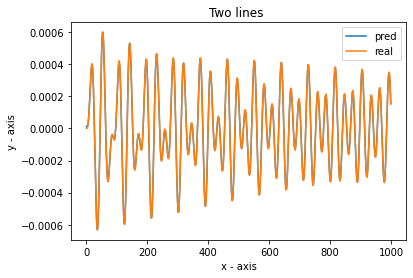

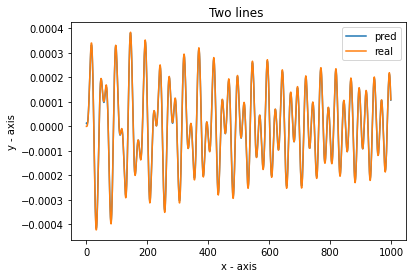

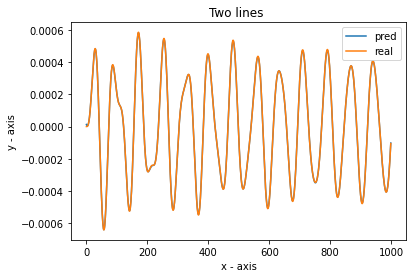

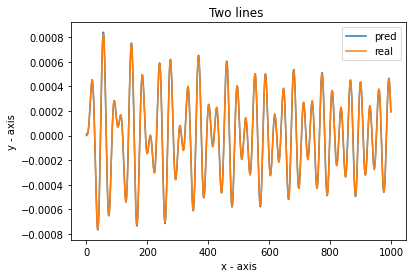

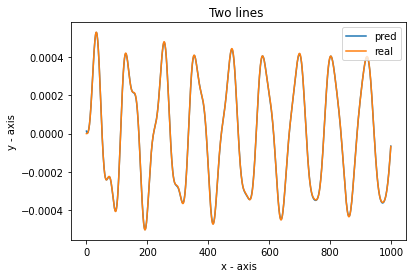

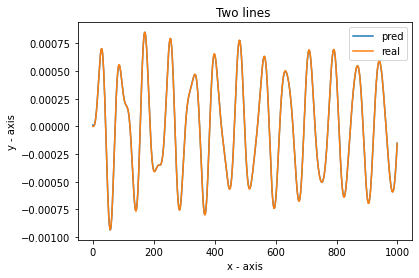

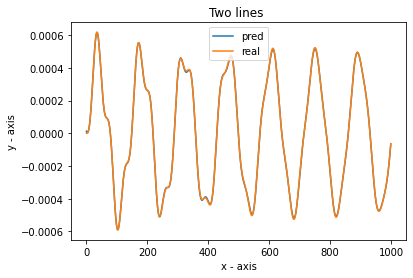

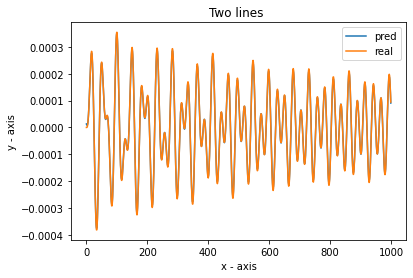

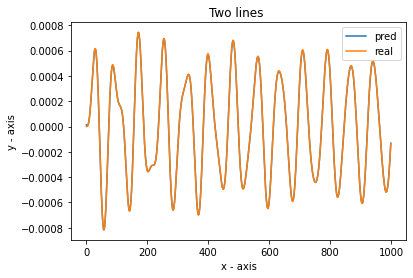

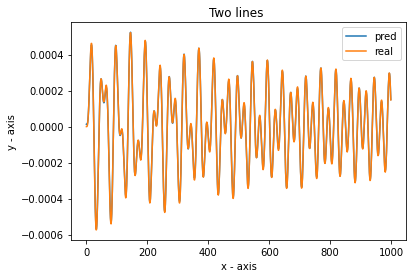

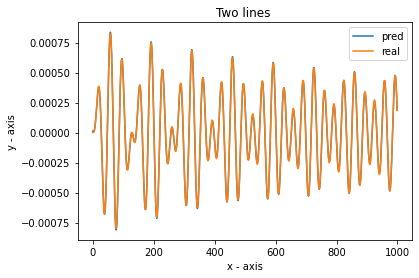

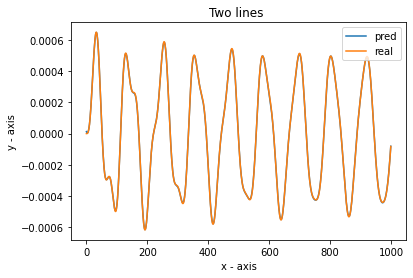

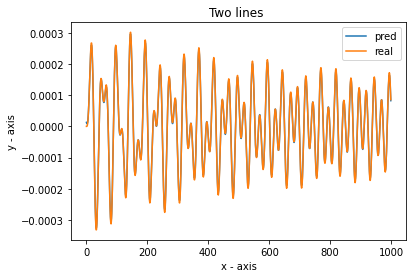

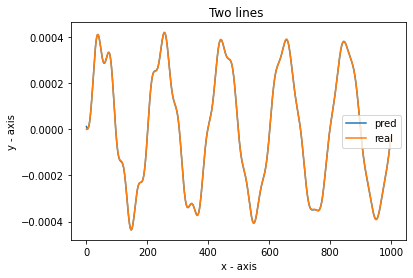

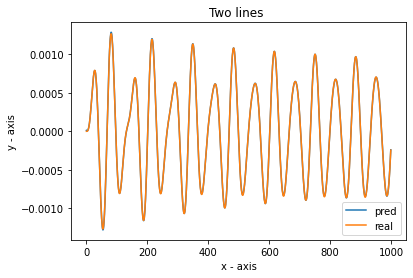

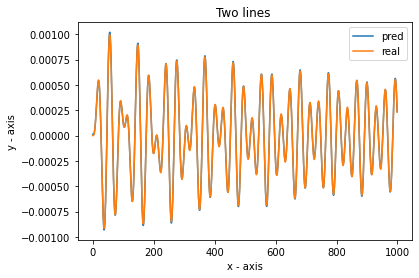

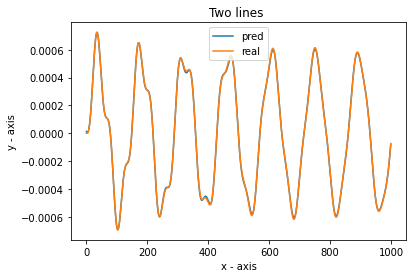

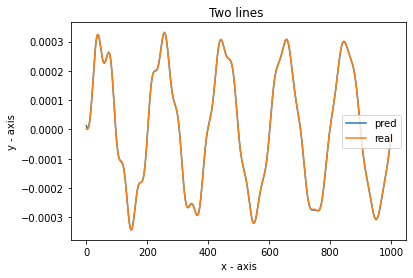

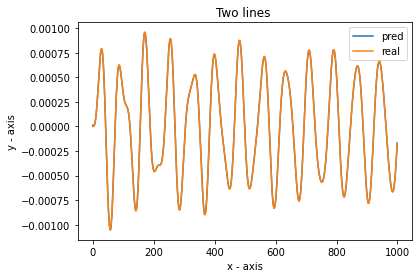

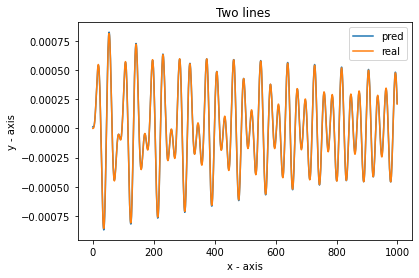

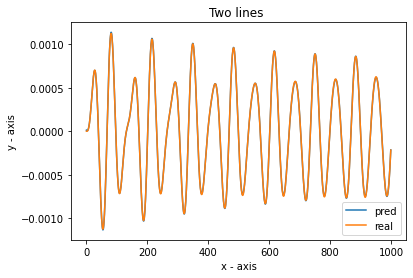

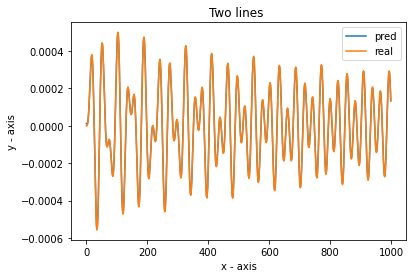

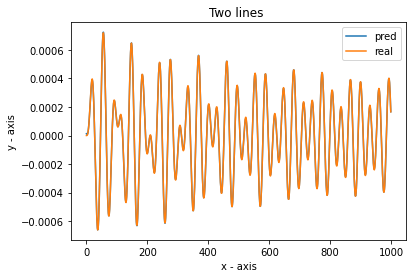

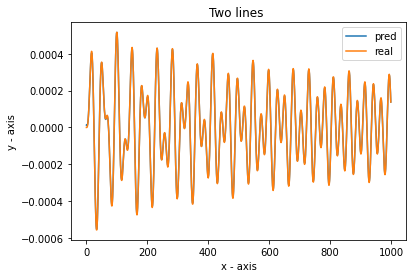

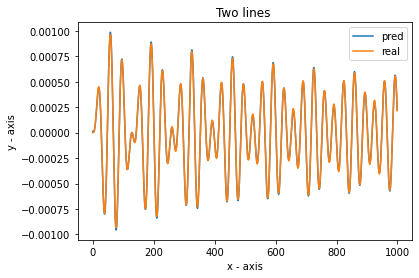

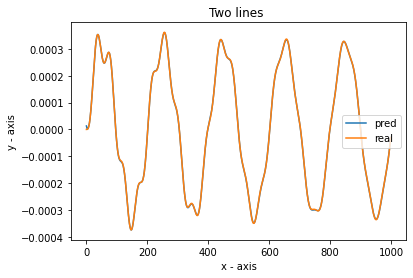

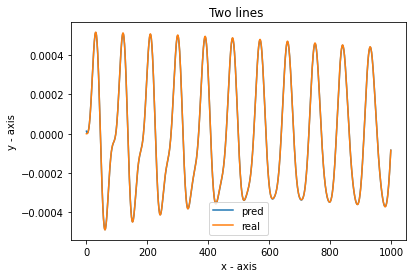

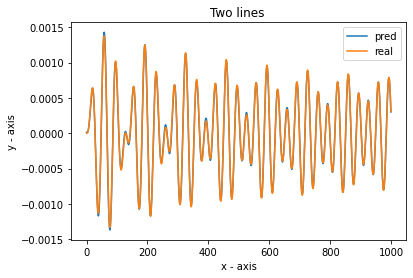

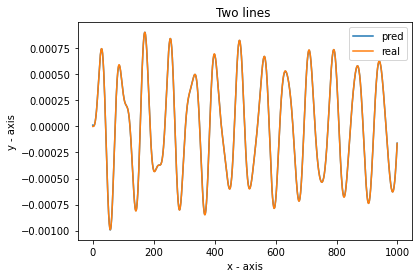

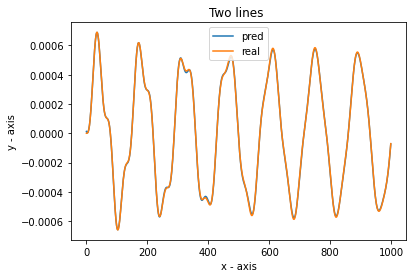

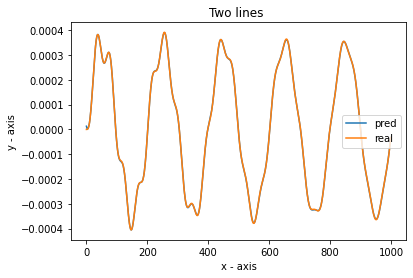

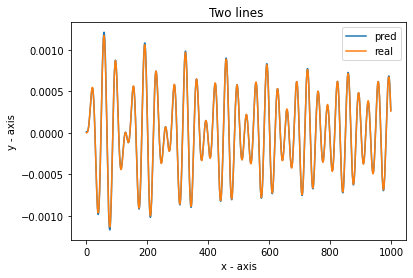

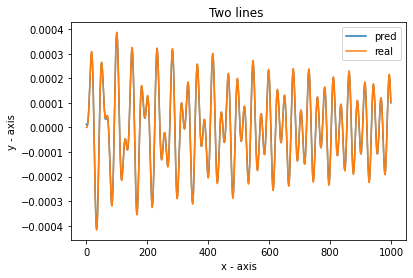

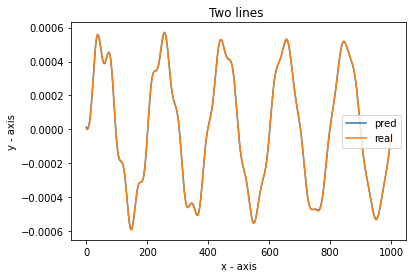

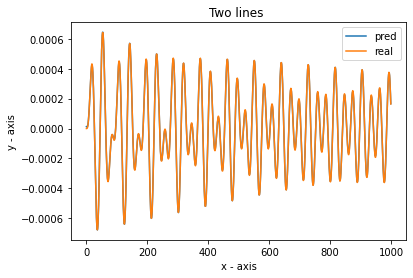

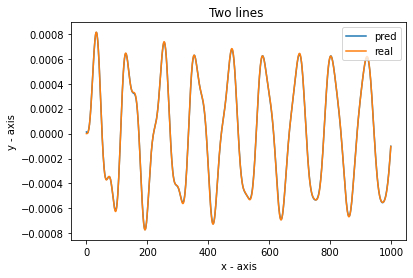

In [13]:
for i in range(36):
    plt.plot(y_pred1[i], label = "pred")

# line 2 points

# plotting the line 2 points

    plt.plot(y_real1[i], label = "real")

# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

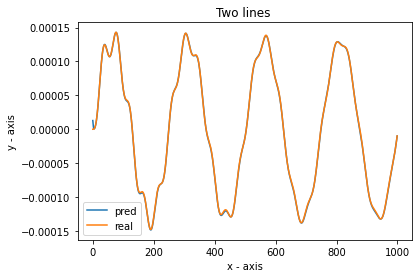

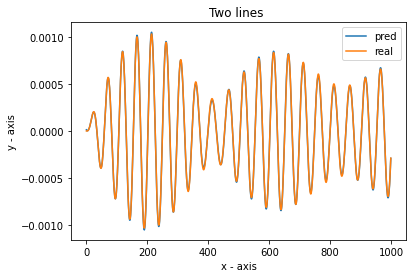

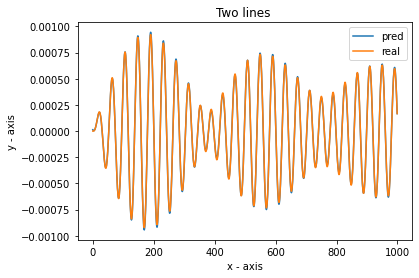

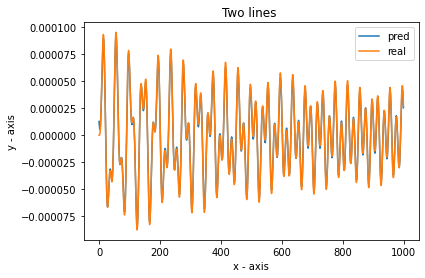

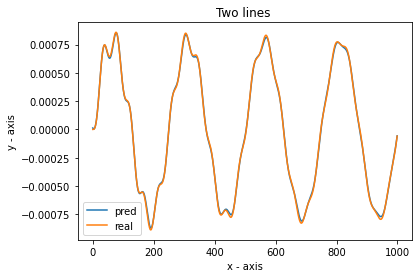

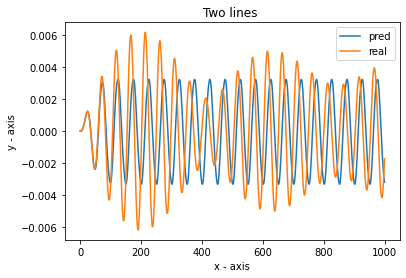

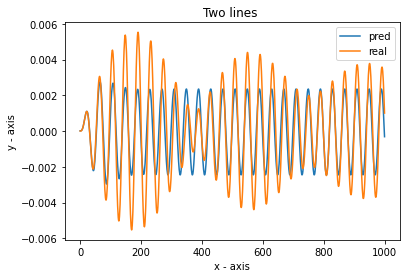

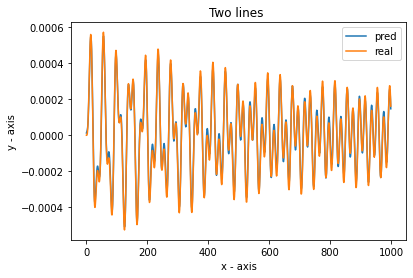

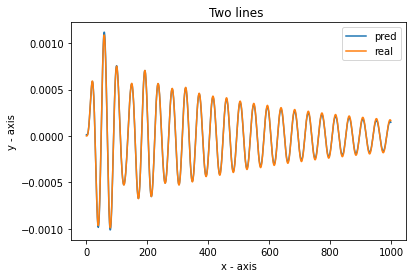

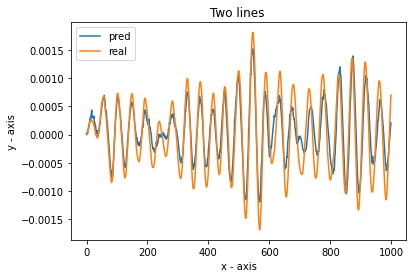

In [14]:
for i in range(10):
    plt.plot(y_pred[i], label = "pred")

# line 2 points

# plotting the line 2 points

    plt.plot(y_real[i], label = "real")

# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

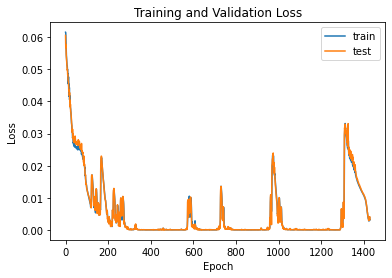

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()